Threshold: 10
nonmaxSuppression:True
neighborhood: 2
Total Keypoints with nonmaxSuppression: 19
Total Keypoints without nonmaxSuppression: 299


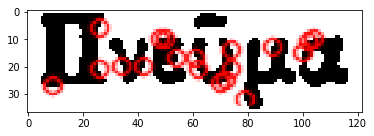

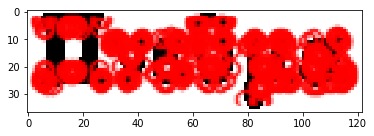

In [16]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread('word/pneuma.png',0)
# Initiate FAST object with default values
fast = cv.FastFeatureDetector_create()
# find and draw the keypoints
kp = fast.detect(img,None)
img2 = cv.drawKeypoints(img, kp, None, color=(255,0,0))
# Print all default params
print( "Threshold: {}".format(fast.getThreshold()) )
print( "nonmaxSuppression:{}".format(fast.getNonmaxSuppression()) )
print( "neighborhood: {}".format(fast.getType()) )
print( "Total Keypoints with nonmaxSuppression: {}".format(len(kp)) )
#cv.imwrite('fast_true.png',img2)
plt.imshow(img2)
# Disable nonmaxSuppression
fast.setNonmaxSuppression(0)
kp = fast.detect(img,None)
print( "Total Keypoints without nonmaxSuppression: {}".format(len(kp)) )
img3 = cv.drawKeypoints(img, kp, None, color=(255,0,0))
#cv.imwrite('fast_false.png',img3)
plt.figure()
plt.imshow(img3)

[1 3]


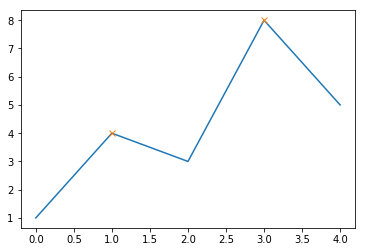

In [15]:
import matplotlib.pyplot as plt
#from scipy.misc import electrocardiogram
from scipy.signal import find_peaks
import numpy as np

y = [1,4,3,8,5]
y=np.asarray(y)
peaks, _ = find_peaks(y, height=0)
print(peaks)
plt.plot(y)
plt.plot(peaks, y[peaks], "x")

plt.show()

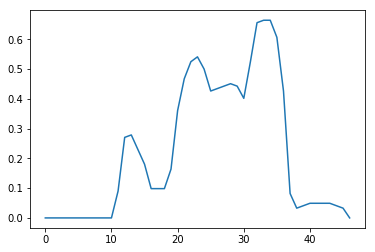

47
[0.27868852 0.54098361 0.45081967 0.66393443 0.04918033]
max= [0.66393443 0.54098361 0.45081967 0.27868852 0.04918033]
33 23 28
(122,)


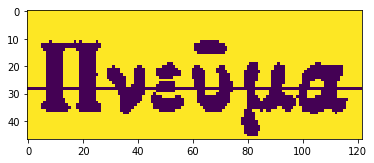

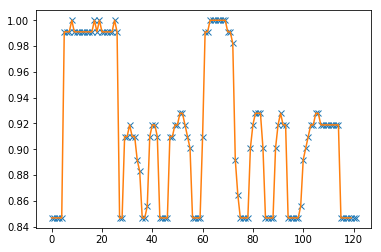

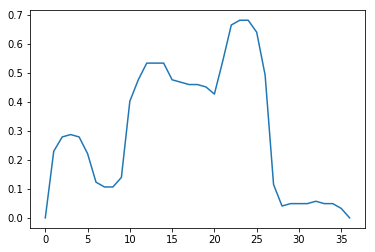

37
[0.28688525 0.53278689 0.68032787 0.05737705]
max= [0.68032787 0.53278689 0.28688525 0.05737705]
23 12 17
(122,)
2
coef= (0.938114335762009, 3.5606467685085606e-56)


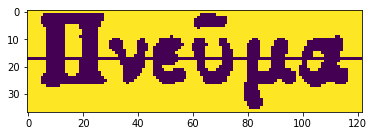

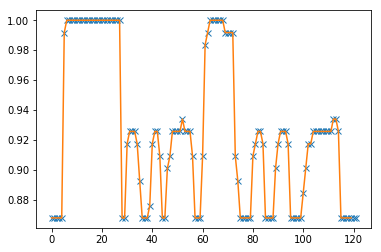

In [5]:
import numpy as np
import cv2 as cv2
from matplotlib import pyplot as plt
from scipy.signal import argrelextrema
from scipy import interpolate
from scipy.interpolate import interp1d
from scipy.signal import correlate
from scipy.stats.stats import pearsonr 

%run ProfileFunctions.py 

%run PgFunctions.py





def xdrawMiddleLine(img2):
    yv=vHist(img2)
    print(len(yv))
    #yv = np.array([1,2,3,4,5,4,3,2,1,2,3,2,1,2,3,4,5,6,5,4,3,2,1])
    # determine the indices of the local maxima
    #maxInd = argrelextrema(yv, np.greater)
    
    maxInd, _ = find_peaks(yv, height=0)
    
    
    
    # get the actual values using these indices
    ymax = yv[maxInd]  # array([5, 3, 6])
    print(ymax)

    maxPoints=np.sort(ymax, axis=0)[::-1]
    print("max=",maxPoints)

    m1=maxPoints[0]
    m2=maxPoints[1]
    Xind1=np.where(yv == m1)
    Xind2=np.where(yv == m2)
    x1=Xind1[0][0]
    x2=Xind2[0][0]
    ym=(x1+x2)//2
    #print(maxInd[0])
    #print(len(maxInd[0]))
    print(x1,x2,ym)
    h=img2.shape[1]
    lineThickness=1
    img2=cv2.line(img2, (5, ym), (h-5, ym), (0,255,0), lineThickness)
    
    return img2, ym


files=['word/pantokrator.png','word/pneuma.png','test/0185.pdf300/1217-1486-120-38.png','word/kyrios.png']

files=['word/pneuma.png','test/0185.pdf300/1217-1486-120-38.png']
files=['test/0186.pdf300/335-675-134-37.png','word/pneuma.png']
files=['test/0192.pdf300/1500-474-132-35.png','word/pneuma.png']
files=['test/0165.pdf300/2679-1527-122-37.png','word/pneuma.png']

interpList=[]
for file in files:
    img = cv2.imread(file,0)

    #img=np.hstack((img,img))
    #img=np.hstack((img,img))
    #img3 = cv2.flip( img, 1 )
    kernel=cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(4,4))
    img3,ym=drawMiddleLine(img)
    #h=img3.shape[1]
    #img3=createPadding(img3, 20)
    
    plt.figure()
    plt.imshow(img3)
    
    #imgup=img3[:ym+3,:]
    #imgup=createPadding(imgup, 20)
    #imgup = cv2.erode(imgup, kernel, iterations=1)
    
    #kernel=cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(4,4))
    #imgdn=img3[ym:h,:]
    #imgdn=createPadding(imgdn, 20)
    #imgdn = cv2.erode(imgdn, kernel, iterations=1)
    
    
    mtrx=[]
    #plt.figure()
    #plt.imshow(imgup)
    #plt.figure()
    #plt.imshow(imgdn)
    #print(img3)
    #img3=np.array([[255,255,255,[0,0,0]])
    for col in img3.T:
        #print(col)
        count=0
        for row in col:
            
            #print(row)
            if row==255:
                count=count+1
                #print(count)
            else: 
                break
        
        #print('count=',count)
        mtrx.append(count)
        
        
    #print('mtrx=',mtrx)
    
    mtrx=np.asarray(mtrx)
    h=img3.shape[1]
    mtrx=h-mtrx
    print(mtrx.shape)
    x = np.arange(0, mtrx.shape[0], 1)
     
    mtrx = mtrx/max(mtrx)
    
    
    tck = interpolate.splrep(x, mtrx, s=0)
    F   = interpolate.PPoly.from_spline(tck)

    #print(F.x)
    #print(F.c)
    # Accessing coeffs of nth segment: index = k + n - 1
    # Eg. for second segment:
    #print(F.c[:,4])
    
    #xnew = np.arange(0, mtrx.shape[0], 1)
    xnew = np.arange(0, 120, 1)
    ynew = interpolate.splev(xnew, tck, der=0)
    ynew=ynew/max(ynew)
    #yynew=interpolate.splev(xnew, tck, der=0)
    interpList.append(ynew)
    plt.figure()
    plt.plot(x, mtrx, 'x', xnew, ynew)

 

print(len(interpList))    
coef=pearsonr(interpList[0],interpList[1])
print('coef=',coef)
    #print(tck)
    #x = np.arange(0, mtrx.shape[0], 1)
    
    #f = interp1d(x, mtrx)
    #print(f)
    #xnew = np.arange(0, mtrx.shape[0], 1)
    
    #plt.figure()
    #plt.plot(x, mtrx, 'x', xnew, f(xnew))
    
    
        
        